In [ ]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
project = pd.read_excel('/Dataset Here')

In [ ]:
project.head()

تبصرے  جذبات
0  تم جیسی اورت کو تو مار جان چاہے ہر جگ ہو ہو پھ...      0
1  میری حمیشہ سی تم خوحیش ہی ہے میرے لوگ  جھوٹ کھ...      1
2  توگے مجھ سے گھر میں غوث کر مڑو گا تغ جیسی اورٹ...      0
3  جب ہم اپکی باتیں سنت ہے تو دل مجھے اپکی عزت یا...      1
4  سالی رندی کی الاواد گشتی اورنگ ننگی ہی کو نہیں...      0

In [ ]:
#le = LabelEncoder()
#le.fit(project['جذبات'])
#project['انکوڈڈ جذبات'] = le.transform(project['جذبات'])

In [ ]:

project.isnull().sum()

In [ ]:
project = project.dropna()

In [ ]:
project[project['جذبات'] == 'Neative'].index

In [ ]:
project.head()

In [ ]:
project.info()

In [ ]:
project.shape

In [ ]:
def cleaner(word):
    word = re.sub(r'\#\.', '', word)
    word = re.sub(r'\n', '', word)
    word = re.sub(r',', '', word)
    word = re.sub(r'\-', ' ', word)
    word = re.sub(r'\.', '', word)
    word = re.sub(r'\\', ' ', word)
    word = re.sub(r'\\x\.+', '', word)
    word = re.sub(r'\d', '', word)
    word = re.sub(r'^_.', '', word)
    word = re.sub(r'_', ' ', word)
    word = re.sub(r'^ ', '', word)
    word = re.sub(r' $', '', word)
    word = re.sub(r'\?', '', word)
    word = re.sub(r'é', '', word)
    word = re.sub(r'§', '', word)
    word = re.sub(r'¦', '', word)
    word = re.sub(r'æ', '', word)
    word = re.sub(r'\d+', '', word)
    word = re.sub('(.*?)\d+(.*?)', '', word)
    return word.lower()
def hashing(word):
    word = re.sub(r'ain$', r'ein', word)
    word = re.sub(r'ai', r'ae', word)
    word = re.sub(r'ay$', r'e', word)
    word = re.sub(r'ey$', r'e', word)
    word = re.sub(r'ie$', r'y', word)
    word = re.sub(r'^es', r'is', word)
    word = re.sub(r'a+', r'a', word)
    word = re.sub(r'j+', r'j', word)
    word = re.sub(r'd+', r'd', word)
    word = re.sub(r'u', r'o', word)
    word = re.sub(r'o+', r'o', word)
    word = re.sub(r'ee+', r'i', word)

    if not re.match(r'ar', word):
        word = re.sub(r'ar', r'r', word)
    word = re.sub(r'iy+', r'i', word)
    word = re.sub(r'ih+', r'eh', word)
    word = re.sub(r's+', r's', word)
    if re.search(r'[rst]y', 'word') and word[-1] != 'y':
        word = re.sub(r'y', r'i', word)
    if re.search(r'[bcdefghijklmnopqrtuvwxyz]i', word):
        word = re.sub(r'i$', r'y', word)
    if re.search(r'[acefghijlmnoqrstuvwxyz]h', word):
        word = re.sub(r'h', '', word)
    word = re.sub(r'k', r'q', word)
    return word

def array_cleaner(array):
    X = []
    for sentence in array:
        clean_sentence = ''
        words = sentence.split(' ')
        for word in words:
            clean_sentence = clean_sentence +' '+ cleaner(word)
        X.append(clean_sentence)
    return X

In [ ]:
def deleteUncharacter(texts):
    clean_text=[]
    for cur in texts:
        cur = re.sub('[^a-zA-Z]',' ',cur)
        cur=cur.lower()
        clean_text.append(cur)
    return clean_text

In [ ]:
project.head()

In [ ]:
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
project['تبصرے'] =  project['تبصرے'].apply(remove_stopwords)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(project['تبصرے'], project['جذبات'], test_size = 0.10, random_state = 1, shuffle = True)

In [ ]:
word_2_vec = project.copy()

In [ ]:
word_2_vec.head()

In [ ]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
word_2_vec["tokens"] = word_2_vec["تبصرے"].apply(tokenizer)

In [ ]:
import gensim
model_word2vec = gensim.models.Word2Vec(sentences=word_2_vec["tokens"], size=128, window=2, workers=5, min_count = 1)

Embedding Layer after word vectors


In [ ]:
VOCAB_SIZE = len(model_word2vec.wv.vocab)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in word_2_vec["tokens"]])

In [ ]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

In [ ]:
from keras.preprocessing.text import Tokenizer#to tokenize the data and made text sequences.
token = Tokenizer()
token.fit_on_texts(word_2_vec["tokens"])
encoded = token.texts_to_sequences(word_2_vec["tokens"])

In [ ]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

In [ ]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [ ]:
train_label = word_2_vec.جذبات

In [ ]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [ ]:
train_sentences

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [ ]:
#model preparation
max_features =9322
embedding_dim =128
sequence_length = MAX_LEN

LSTM_model = tf.keras.Sequential()
LSTM_model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_initializer = Init.Constant(words2vec_matrix),embeddings_regularizer = regularizers.l2(0.005)))

LSTM_model.add(tf.keras.layers.Dropout(0.1))

LSTM_model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.1, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

LSTM_model.add(tf.keras.layers.Flatten())

LSTM_model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
LSTM_model.add(tf.keras.layers.Dropout(0.1))

LSTM_model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
LSTM_model.add(tf.keras.layers.Dropout(0.1))


LSTM_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))




LSTM_model.summary()
LSTM_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
LS_NET = LSTM_model.fit( train_sentences, train_tags, epochs=10, validation_split=0.10 )

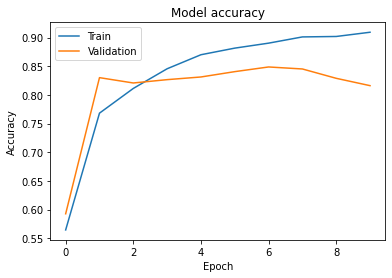

In [ ]:
plt.plot(LS_NET.history['binary_accuracy'])
plt.plot(LS_NET.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(LSTM_model.predict(test_sentences).round(), test_tags))

In [ ]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=True ))

model.add(Layers.Conv1D(512, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))


model.add(Layers.Conv1D(128, 3, activation="relu"))
model.add(Layers.Dropout(0.1))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(64, 1, activation="relu"))
model.add(Layers.Dropout(0.1))
model.add(Layers.MaxPooling1D(1))

model.add(Layers.Conv1D(32, 1, activation="relu"))
model.add(Layers.Dropout(0.1))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.1))

model.add(Layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
CNN = model.fit( train_sentences, train_tags, epochs=10, validation_split=0.10 )

Epoch 1/10
242/242 [==============================] - 38s 154ms/step - loss: 0.6726 - accuracy: 0.5688 - val_loss: 0.4075 - val_accuracy: 0.8300
Epoch 2/10
242/242 [==============================] - 37s 153ms/step - loss: 0.3526 - accuracy: 0.8613 - val_loss: 0.3700 - val_accuracy: 0.8277
Epoch 3/10
242/242 [==============================] - 37s 152ms/step - loss: 0.1882 - accuracy: 0.9269 - val_loss: 0.4007 - val_accuracy: 0.8428
Epoch 4/10
242/242 [==============================] - 37s 153ms/step - loss: 0.1358 - accuracy: 0.9533 - val_loss: 0.5824 - val_accuracy: 0.8463
Epoch 5/10
242/242 [==============================] - 37s 152ms/step - loss: 0.1119 - accuracy: 0.9593 - val_loss: 0.6491 - val_accuracy: 0.8533
Epoch 6/10
242/242 [==============================] - 37s 151ms/step - loss: 0.0849 - accuracy: 0.9660 - val_loss: 0.6421 - val_accuracy: 0.8417
Epoch 7/10
242/242 [==============================] - 37s 152ms/step - loss: 0.0787 - accuracy: 0.9701 - val_loss: 0.8620 - val_ac

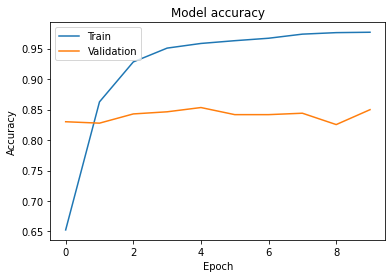

In [ ]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(model.predict(test_sentences).round(), test_tags))